# Final Project DSCI-552


reference: 
1) https://matplotlib.org/stable/index.html
2) https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
3) https://github.com/INTERMT/Awesome-Keras-Chinese

## Text Classification

(a) In this problem, we are trying to build a classifier to analyze the sentiment of
reviews. You are provided with text data in two folders: one folder involves
positive reviews, and one folder involves negative reviews

In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt

def read_txt_files(directory):
    texts = []
    file_paths = glob.glob(os.path.join(directory, '*.txt'))
    for file_path in file_paths:
        with open(file_path, 'r', encoding='utf-8') as file:
            texts.append(file.read())
    return texts

def clean_text(text):
    if not isinstance(text, str):  
        return ''  # debug
    # remove non-alphabetical characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

def split(df):
    # iii. The name of each text file starts with cv number. 
    # Use text files 0-699 in each class for training and 700-999 for testing
    df['text'] = df['text'].apply(clean_text)
    
    training_df = df.iloc[:700, :]
    testing_df = df.iloc[700:, :]
    return training_df, testing_df


### (b) Data Exploration and Pre-processing

In [3]:
neg_directory = '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/final_project/Data/neg/'
pos_directory = '/Users/yinterested/文件(D)/研究生课程/DSCI_552-master/final_project/Data/pos/'

neg_labels = [-1] * len(read_txt_files(neg_directory))  # negative label
pos_labels = [1] * len(read_txt_files(pos_directory))  # positive label

neg_df = pd.DataFrame({'text': read_txt_files(neg_directory), 'label': neg_labels})
pos_df = pd.DataFrame({'text': read_txt_files(neg_directory), 'label': pos_labels})

training_dfneg, testing_dfneg = split(neg_df)
training_dfpos, testing_dfpos = split(pos_df)

# Combine the two dataframe into 1
training = pd.concat([training_dfneg, training_dfpos], ignore_index=True)
testing = pd.concat([testing_dfneg, testing_dfpos], ignore_index=True)

In [3]:
training

,text,label
0,bad bad bad that one word seems to pretty much...,-1
1,isnt it the ultimate sign of a movies cinemati...,-1
2,gordy is not a movie it is a minutelong sesame...,-1
3,disconnect the phone line dont accept the char...,-1
4,when robert forster found himself famous again...,-1
...,...,...
1395,ahh yes the teenage romance an attractive youn...,1
1396,because im a scientist thats what we do dr ale...,1
1397,written by david j schow and john shirley base...,1
1398,one of my brothers favorite movies is h b hali...,1


In [4]:
testing

,text,label
0,synopsis cromagnon ayla loses her mother to an...,-1
1,contrary to popular belief not every single fo...,-1
2,and i thought stigmata would be the worst reli...,-1
3,years ago national lampoon introduced us to a ...,-1
4,roger ebert asks in his review of sexy beast w...,-1
...,...,...
595,synopsis when a meteorite crashlands in the ar...,1
596,its now the anniversary of the slayings of jul...,1
597,coinciding with the emerging popularity of mov...,1
598,and now the highflying hong kong style of film...,1


In [4]:
df = pd.concat([training,testing])
df

,text,label
0,bad bad bad that one word seems to pretty much...,-1
1,isnt it the ultimate sign of a movies cinemati...,-1
2,gordy is not a movie it is a minutelong sesame...,-1
3,disconnect the phone line dont accept the char...,-1
4,when robert forster found himself famous again...,-1
...,...,...
595,synopsis when a meteorite crashlands in the ar...,1
596,its now the anniversary of the slayings of jul...,1
597,coinciding with the emerging popularity of mov...,1
598,and now the highflying hong kong style of film...,1


iv. Count the number of unique words in the whole dataset (train + test) and
print it out.

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(binary=True) # set binary true to only count each word once
text = df['text'].to_list()
vectorizer.fit(text)
unique_words = vectorizer.get_feature_names_out()

# Print
print("the number of unique words in the whole dataset is", len(unique_words))

the number of unique words in the whole dataset is 32186


v. Calculate the average review length and the standard deviation of review
lengths. Report the results

In [6]:
# Calculate average review length, split word, not count the string lenth
df['review_length'] = df['text'].apply(lambda x: len(x.split()))
average_length = df['review_length'].mean()
std_dev = df['review_length'].std()

print(f"The average review length is {average_length}, the standard deviation (SD) of review length is {std_dev}")

The average review length is 607.502, the standard deviation (SD) of review length is 255.77627870538385


In [37]:
df

,text,label
0,bad bad bad that one word seems to pretty much...,0
1,isnt it the ultimate sign of a movies cinemati...,0
2,gordy is not a movie it is a minutelong sesame...,0
3,disconnect the phone line dont accept the char...,0
4,when robert forster found himself famous again...,0
...,...,...
595,synopsis when a meteorite crashlands in the ar...,1
596,its now the anniversary of the slayings of jul...,1
597,coinciding with the emerging popularity of mov...,1
598,and now the highflying hong kong style of film...,1


vi. Plot the histogram of review lengths

<Axes: >

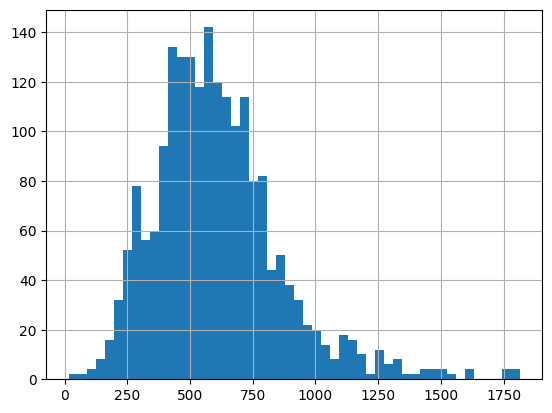

In [7]:
# set the number of bins with the *bins* keyword argument as 50, 
# the review lenth is obviously a skewed distribution
df['review_length'].hist(bins=50)

vii. To represent each text (= data point), there are many ways. In NLP/Deep
Learning terminology, this task is called tokenization. It is common to represent text using popularity/ rank of words in text. The most common word
in the text will be represented as 1, the second most common word will be
represented as 2, etc. Tokenize each text document using this method

reference: 

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://www.tensorflow.org/responsible_ai/fairness_indicators/tutorials/Fairness_Indicators_TFCO_Wiki_Case_Study


In [8]:
# pip install apache_beam
# pip install --upgrade keras-nlp
import keras
print(keras.__version__)

import apache_beam as beam
from IPython.display import display
from IPython.display import HTML
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing import text
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, Conv1D, MaxPooling1D


3.3.3


In [9]:
# tokenization
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(df["text"])
# check the result
tokenizer.word_index

{'the': 1,
 'a': 2,
 'and': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'in': 7,
 'that': 8,
 'it': 9,
 'with': 10,
 'this': 11,
 'as': 12,
 'for': 13,
 'but': 14,
 'i': 15,
 'film': 16,
 'his': 17,
 'on': 18,
 'he': 19,
 'are': 20,
 'be': 21,
 'movie': 22,
 'its': 23,
 'by': 24,
 'an': 25,
 'have': 26,
 'not': 27,
 'one': 28,
 'at': 29,
 'who': 30,
 'was': 31,
 'from': 32,
 'you': 33,
 'they': 34,
 'has': 35,
 'all': 36,
 'her': 37,
 'so': 38,
 'like': 39,
 'about': 40,
 'out': 41,
 'or': 42,
 'when': 43,
 'up': 44,
 'just': 45,
 'if': 46,
 'some': 47,
 'more': 48,
 'what': 49,
 'there': 50,
 'their': 51,
 'which': 52,
 'no': 53,
 'even': 54,
 'only': 55,
 'into': 56,
 'she': 57,
 'him': 58,
 'than': 59,
 'good': 60,
 'time': 61,
 'we': 62,
 'can': 63,
 'been': 64,
 'would': 65,
 'get': 66,
 'do': 67,
 'bad': 68,
 'much': 69,
 'will': 70,
 'them': 71,
 'most': 72,
 'characters': 73,
 'films': 74,
 'story': 75,
 'character': 76,
 'any': 77,
 'plot': 78,
 'other': 79,
 'two': 80,
 'after': 81,
 '

viii. Select a review length L that 70% of the reviews have a length below it. If
you feel more adventurous, set the threshold to 90%.


ix. Truncate reviews longer than L words and zero-pad reviews shorter than L
so that all texts (= data points) are of length L.

In [11]:
import numpy as np
# viii
review_lengths = df['review_length'].values
review_70_length = int(np.percentile(review_lengths, 70))
print("Value at the 70th percentile of review lengths:", review_70_length)

# ix
def truncate(texts, tokenizer, max_sequence_length):
    # Turns text into into padded sequences.
    text_sequences = tokenizer.texts_to_sequences(texts)
    
    # padding='post'
    # truncating='post'
    # padding is done with zeros at the end of sequences shorter than the specified maximum length 
    return sequence.pad_sequences(text_sequences, maxlen=max_sequence_length, padding='post', truncating='post')

# here max_sequence_length = percentile 70 (737)
text_df = truncate(df["text"], tokenizer, review_70_length)
training_x = truncate(training["text"], tokenizer, review_70_length)
testing_x = truncate(testing["text"], tokenizer, review_70_length)

Value at the 70th percentile of review lengths: 700


In [11]:
text_df.shape

# here we have 2000 document (text), and each document's length is 700 words

(2000, 700)

In [12]:
training_x.shape

(1400, 700)

### (c) Word Embeddings

use a word embedding layer for this project. Assume that we are interested in the top 5,000 words. This means that in each integer sequence that
represents each document, we set to zero those integers that represent words
that are not among the top 5,000 words in the document.5 If you feel more
adventurous, use all the words that appear in this corpus. Choose the length
of the embedding vector for each word to be 32. Hence, each document is
represented as a 32 ×L matrix

In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluation(ytrue, ypred):
    # for report result
    results = {
        'accuracy': [accuracy_score(ytrue, ypred)],
        'precision': [precision_score(ytrue, ypred, zero_division=0)],
        'recall': [recall_score(ytrue, ypred)],
        'f1': [f1_score(ytrue, ypred)],
    }
    
    return pd.DataFrame(results)

In [15]:
def preprocess_documents(documents, top_words, embedding_dim):
    # Create a dictionary to map words to indices
    word_index = {}
    for doc in documents:
        for word in doc:
            word_index[word] = word_index.get(word, 0) + 1
            
    # Select the top 5000 words based on frequency
    top_words_list = sorted(word_index, key=word_index.get, reverse=True)[:top_words]
    # Create a word to index dictionary
    word_to_index = {word: idx + 1 for idx, word in enumerate(top_words_list)}
    # Convert documents to sequences of indices
    sequences = [[word_to_index.get(word, 0) for word in doc] for doc in documents]

    # Create the embedding matrix
    embedding_matrix = np.zeros((top_words + 1, embedding_dim))
    for word, idx in word_to_index.items():
        if idx > top_words:
            continue
        embedding_vector = np.random.rand(embedding_dim)  # initialize with random values or zeros
        embedding_matrix[idx] = embedding_vector

    # Create the embedding layer
    embedding_layer = Embedding(input_dim=top_words+1, output_dim=embedding_dim,
                                weights=[embedding_matrix], input_length=review_70_length)

    # Flatten the embedding layer
    flatten_layer = Flatten()

    return embedding_layer, flatten_layer

# Example usage
documents = text_df  # shape=(2000, 737)
top_words = 5000
embedding_dim = 32

embedding_layer, flatten_layer = preprocess_documents(documents, top_words, embedding_dim)

### (d) Multi-Layer Perceptron

Train a MLP with three (dense) hidden layers each of which has 50 ReLUs
and one output layer with a single sigmoid neuron. Use a dropout rate of
20% for the first layer and 50% for the other layers. Use ADAM optimizer
and binary cross entropy loss (which is equivalent to having a softmax in the
output). To avoid overfitting, just set the number of epochs as 2. Use a batch
size of 10

reference: https://keras-cn.readthedocs.io/en/latest/

[input] -> | hidden layer | -> 50 ReLUS -> | hidden layer | -> 50 ReLUS -> | hidden layer | -> 50 ReLUS -> |output layer (single sigmoid)|

In [16]:
# define model parameters
max_words = 5000  # Specify the input dimension
epochs = 2
batch_size = 10

# tokenizer
tokenizer = text.Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(training["text"])

training_sequences = tokenizer.texts_to_sequences(training["text"])
testing_sequences = tokenizer.texts_to_sequences(testing["text"])

training_x = sequence.pad_sequences(training_sequences, maxlen=review_70_length, padding='post', truncating='post')
testing_x = sequence.pad_sequences(testing_sequences, maxlen=review_70_length, padding='post', truncating='post')

In [37]:
import tensorflow as tf

''' 
def bipolar_sigmoid(x):
    return (2 / (1 + tf.exp(-x))) - 1

def custom_binary_crossentropy_with_labels(y_true, y_pred):
    # convert y_true from [-1, 1] to [0, 1]
    y_pred = (y_pred + 1) / 2
    y_true = (y_true + 1) / 2
    
    y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1 - tf.keras.backend.epsilon())  # 避免log(0)
    loss = -y_true * tf.math.log(y_pred) - (1 - y_true) * tf.math.log(1 - y_pred)
    return tf.reduce_mean(loss)
'''
# define model
def create_mlp():
    model = keras.models.Sequential()
    
    # add the embedding layer
    model.add(Embedding(max_words + 1, output_dim=32, input_length = review_70_length))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the MLP model
model = create_mlp()

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# model.summary()

# adjust the label setting since the binary_crossentropy is for 0 / 1 label 
# or use bipolar_sigmoid and custom binary cross_entropy
# Here I chose to adjust the label type(a more simple and easier way)
training['label'] = training['label'].apply(lambda x: 0 if x == -1 else 1)
testing['label'] = testing['label'].apply(lambda x: 0 if x == -1 else 1)

# Train the model
model.fit(training_x, training['label'].values, 
          epochs=epochs, 
          batch_size=batch_size)

predic = model.predict(training_x, batch_size=128)
predictions_binary = [1 if p > 0.5 else -1 for p in predic]
training_result = evaluation(training['label'].values, predictions_binary)
print(f'training set result: {training_result}')

predic = model.predict(testing_x, batch_size=128)
predictions_binary = [1 if p > 0.5 else -1 for p in predic]
test_result = evaluation(testing['label'].values, predictions_binary)
print(f'test set result: {test_result}')

Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9843 - loss: 0.0364
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.0000e+00
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
training set result:    accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
test set result:    accuracy  precision  recall   f1
0       1.0        1.0     1.0  1.0


### (e) One-Dimensional Convolutional Neural Network

i. After the embedding layer, insert a Conv1D layer. This convolutional layer
has 32 feature maps , and each of the 32 kernels has size 3, i.e. reads embedded
word representations 3 vector elements of the word embedding at a time. The
convolutional layer is followed by a 1D max pooling layer with a length and
stride of 2 that halves the size of the feature maps from the convolutional
layer. The rest of the network is the same as the neural network above.

ii. Report the train and test accuracies of this model

In [42]:
def create_cnn():
    model = keras.models.Sequential()
    
    # Embedding layer
    model.add(Embedding(max_words + 1, output_dim=32, input_length=review_70_length))
    
    # Convolutional Layer
    model.add(Conv1D(32, 3, activation='relu', padding = 'same'))  # 32 feature maps and a kernel size of 3
    # 1D max pooling
    model.add(MaxPooling1D(2, padding = 'same'))  # Pool size and strides of 2

    # Flatten data
    model.add(Flatten())

    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(1, activation='sigmoid')) 
    return model

model = create_cnn()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss='binary_crossentropy', # or custom_binary_crossentropy_with_labels 
              metrics=['accuracy'])

'''
# Adjust the label setting since the binary_crossentropy is for 0 / 1 label
training['label'] = training['label'].apply(lambda x: 0 if x == -1 else 1)
testing['label'] = testing['label'].apply(lambda x: 0 if x == -1 else 1)
'''

# training and record the history
history = model.fit(training_x, training['label'].values, 
                    epochs=epochs, 
                    batch_size=batch_size,
                    validation_data=(testing_x, testing['label'].values))

# evaluation
train_acc1 = history.history['accuracy'][-2]
test_acc1 = history.history['val_accuracy'][-2]
print("the training accuracy[epoch1]: {:.2f}%".format(train_acc1 * 100))
print("the testing accuracy[epoch1]: {:.2f}%".format(test_acc1 * 100))

train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print("the training accuracy[epoch2]: {:.2f}%".format(train_acc * 100))
print("the testing accuracy[epoch2]: {:.2f}%".format(test_acc * 100))

Epoch 1/2


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9804 - loss: 0.0323 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/2
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
the training accuracy[epoch1]: 99.64%
the testing accuracy[epoch1]: 100.00%
the training accuracy[epoch2]: 100.00%
the testing accuracy[epoch2]: 100.00%


### (f) Long Short-Term Memory Recurrent Neural Network

Each word is represented to LSTM as a vector of 32 elements and the LSTM
is followed by a dense layer of 256 ReLUs. Use a dropout rate of 0.2 for both LSTM and the dense layer. Train the model using 10-50 epochs and batch
size of 10.

Report the train and test accuracies of this model.

In [39]:
from tensorflow.keras.layers import LSTM

def create_lstm():
    model = keras.models.Sequential()
    # embedding layer
    model.add(Embedding(max_words + 1, output_dim=32, input_length=review_70_length))
    model.add(LSTM(32, dropout=0.2, recurrent_dropout=0.2))  # 32 LSTM units, add dropout to LSTM
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))  
    model.add(Dense(1, activation='sigmoid'))
    return model

model = create_lstm()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

training['label'] = training['label'].apply(lambda x: 0 if x == -1 else 1)
testing['label'] = testing['label'].apply(lambda x: 0 if x == -1 else 1)

# train the model
history = model.fit(training_x, training['label'].values, 
                    epochs=10, 
                    batch_size=10,
                    validation_data=(testing_x, testing['label'].values))

# evaluation
train_acc = history.history['accuracy'][-1]
test_acc = history.history['val_accuracy'][-1]
print("the training accuracy: {:.2f}%".format(train_acc * 100))
print("the testing accuracy: {:.2f}%".format(test_acc * 100))


Epoch 1/10


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


140/140 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.9647 - loss: 0.0633 - val_accuracy: 1.0000 - val_loss: 9.4108e-24
Epoch 2/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 1.0000 - loss: 9.7331e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 3/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 1.0000 - loss: 1.5608e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 4/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 106ms/step - accuracy: 1.0000 - loss: 2.4825e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 5/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 105ms/step - accuracy: 1.0000 - loss: 1.9002e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 6/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 1.0000 - loss: 7.8655e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 7/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15s 110ms/step - accuracy: 1.0000 - loss: 4.0632e-22 - val_accuracy: 1.0000 - val_loss: 9.4102e-24
Epoch 8/10
140/140 ━━━━━━━━━━━━━━━━━━━━ 15